In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tbCallBack = TensorBoard(log_dir='./log/Fashion_MNIST', histogram_freq=0, write_graph=True, write_images=True)

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

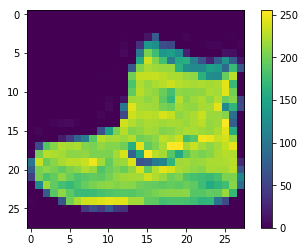

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

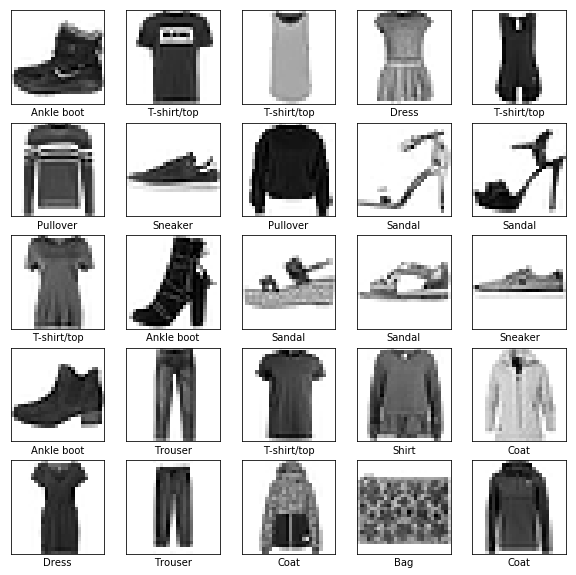

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5, callbacks=[tbCallBack])

Epoch 1/5
60000/60000 [==============================] - 32s 535us/step - loss: 0.4962 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 31s 519us/step - loss: 0.3697 - acc: 0.8665
Epoch 3/5
60000/60000 [==============================] - 31s 511us/step - loss: 0.3334 - acc: 0.8788
Epoch 4/5
60000/60000 [==============================] - 32s 538us/step - loss: 0.3079 - acc: 0.8877
Epoch 5/5
60000/60000 [==============================] - 30s 504us/step - loss: 0.2918 - acc: 0.8932


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 78us/step
Test accuracy: 0.8663


# tensorboard --logdir log/Fashion_MNIST

In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([1.5737973e-05, 9.3942703e-07, 3.0778750e-08, 4.3052655e-09,
       3.5613753e-06, 5.1263288e-02, 4.3608802e-06, 4.4542961e-02,
       5.7691650e-05, 9.0411144e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [20]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

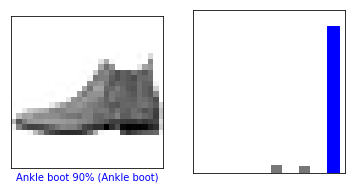

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

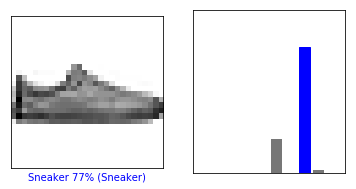

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

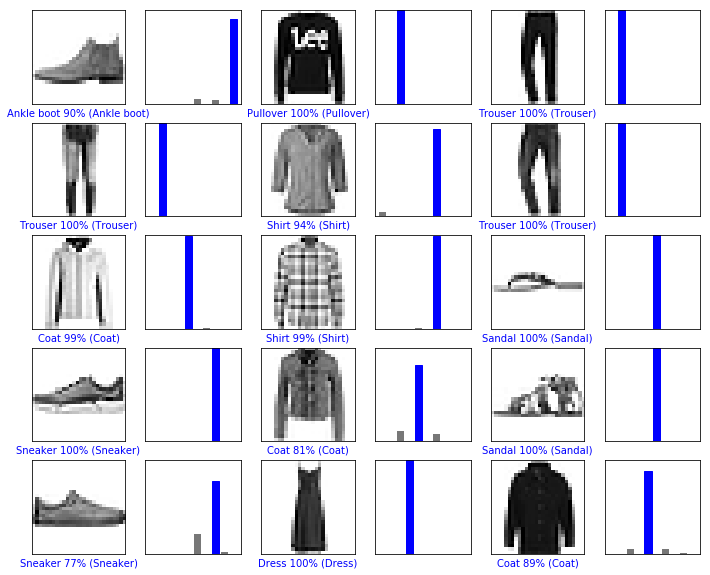

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

(28, 28)


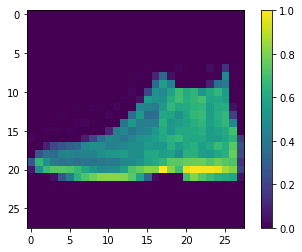

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)

In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5737973e-05 9.3942515e-07 3.0778807e-08 4.3052735e-09 3.5613789e-06
  5.1263276e-02 4.3608802e-06 4.4542950e-02 5.7691650e-05 9.0411144e-01]]


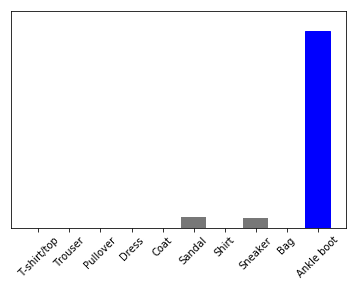

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

9